In [1]:
# ライブラリーを　持ってくる
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# tips　データを　持ってくる
tips = sns.load_dataset('tips')

In [3]:
# 構造を確認する。
tips.shape

(244, 7)

In [4]:
# データのサンプルを確認する。
tips.head(2)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

In [5]:
# コラムのデータタイプを確認する。
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [6]:
# 名目形変数、連続形変数の　記述統計値を確認する。
# describe()
tips.describe(include='all')

total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   244    244  244     244  244.000000
unique         NaN         NaN     2      2    4       2         NaN
top            NaN         NaN  Male     No  Sat  Dinner         NaN
freq           NaN         NaN   157    151   87     176         NaN
mean     19.785943    2.998279   NaN    NaN  NaN     NaN    2.569672
std       8.902412    1.383638   NaN    NaN  NaN     NaN    0.951100
min       3.070000    1.000000   NaN    NaN  NaN     NaN    1.000000
25%      13.347500    2.000000   NaN    NaN  NaN     NaN    2.000000
50%      17.795000    2.900000   NaN    NaN  NaN     NaN    2.000000
75%      24.127500    3.562500   NaN    NaN  NaN     NaN    3.000000
max      50.810000   10.000000   NaN    NaN  NaN     NaN    6.000000

In [7]:
# 各変数に対して　記述統計値で確認出来る意味
# カテゴリー形変数 : sex, smoker, day, time
# 連続形変数 : total_bill, tip, size
# 確認する事項 : sex, smoker, day, time のカテゴリーの種類

In [8]:
# 欠測値を確認する。
# 欠測値: NaN, None
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [9]:
# カテゴリー形変数を把握する。
# 各カテゴリー把握
tips['sex'].unique()
set(tips['sex'].values)

{'Female', 'Male'}

In [10]:
for col in tips.select_dtypes(include='category'):
    print(col, tips[col].unique())

sex [Female, Male]
Categories (2, object): [Female, Male]
smoker [No, Yes]
Categories (2, object): [No, Yes]
day [Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]
time [Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]


In [11]:
# 性別：　男性と　女性の　客の割合/数　
# matplotlib
# seaborn

In [12]:
# 1. df.value_counts() & plot(kind=bar)
# 2. df.value_counts() & plt.bar()
# 3. sns.barplot(df.value_counts())
# 4. sns.countplot(x=col, data=df)

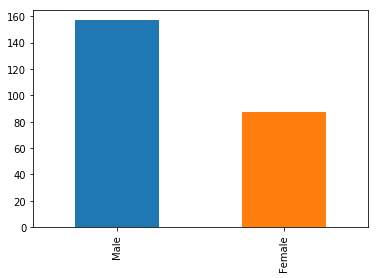

In [13]:
# 男性と　女性の　客の数
tips['sex'].value_counts().plot(kind='bar')

<BarContainer object of 2 artists>

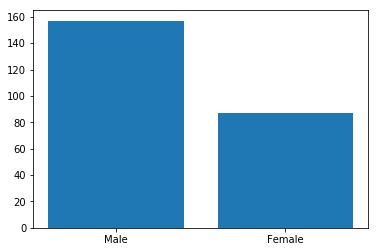

In [14]:
# plt.bar(x, y)
plt.bar(tips['sex'].value_counts().index, tips['sex'].value_counts().values)

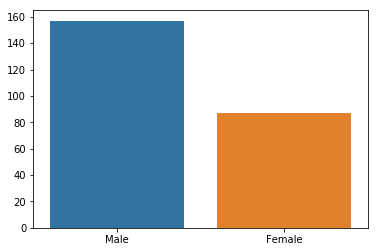

In [15]:
sns.barplot(tips['sex'].value_counts().index, tips['sex'].value_counts().values)

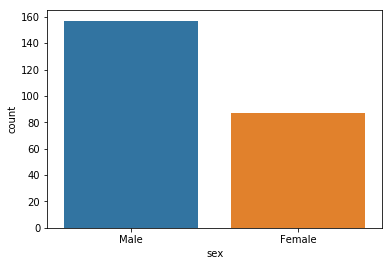

In [16]:
sns.countplot(data=tips, x='sex')

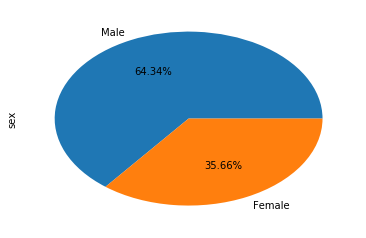

In [17]:
# 各性別の　全体割合　
# plt.pie(tips['sex'].value_counts(), labels=tips['sex'].value_counts().index,
#        autopct='%.2f%%')
tips['sex'].value_counts().plot(kind='pie', autopct='%.2f%%')

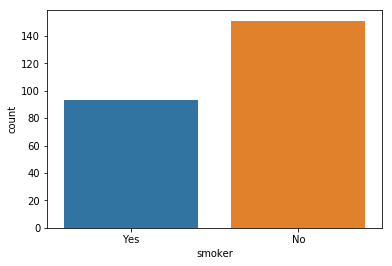

In [18]:
# 喫煙者：　喫煙者と　非喫煙者の割合/数
sns.countplot(data=tips, x='smoker')

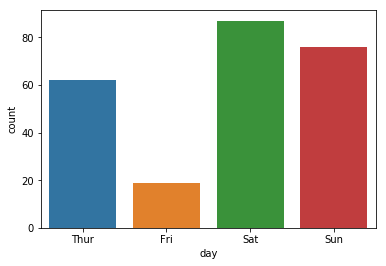

In [19]:
# 曜日：　曜日別　訪問頻度数
sns.countplot(data=tips, x='day')

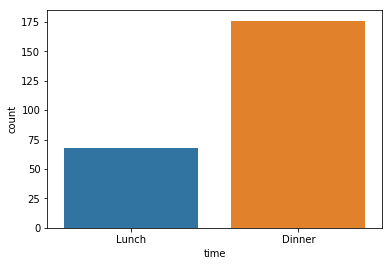

In [20]:
# 時間帯：　時間帯別　訪問頻度数
sns.countplot(data=tips, x='time')

In [21]:
# 曜日別　総客数
# どの曜日に　客が　一番沢山来るのか？
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [22]:
# 土曜日の客数
tips[tips['day']=='Sat']['size'].sum()

219

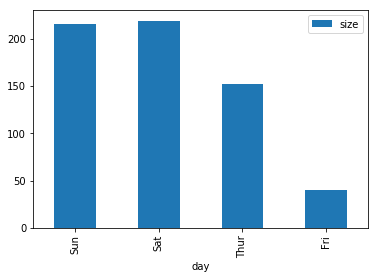

In [23]:
# 曜日別　総客数
tips.pivot_table(index='day', values='size', aggfunc='sum').plot(kind='bar')

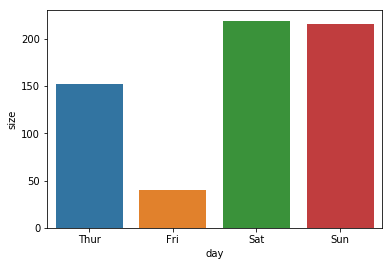

In [24]:
tmp = tips.pivot_table(index='day', values='size', aggfunc='sum')
sns.barplot(data=tmp.reset_index(), x='day', y='size')

In [25]:
# 曜日別　総客数と　総チップ
# 曜日別　総客数と　総チップは比例しますか？
tips.pivot_table(index='day', values=['size', 'tip'], aggfunc='sum')

size     tip
day               
Sun    216  247.39
Sat    219  260.40
Thur   152  171.83
Fri     40   51.96

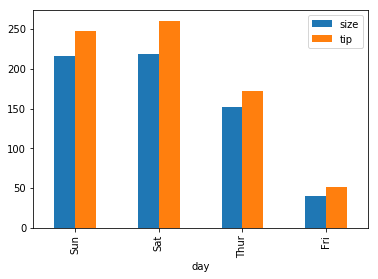

In [26]:
tips.pivot_table(index='day', values=['size', 'tip'], aggfunc='sum').plot(kind='bar')

In [27]:
# 性別　平均チップ
# 平均チップを　もっと　沢山渡した　性別は？

In [28]:
# 1. データを　加工して plot => df.plot(kind='bar')
tips.pivot_table(index='sex', values='tip', aggfunc='mean')

tip
sex             
Female  2.833448
Male    3.089618

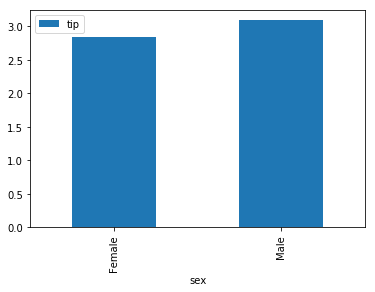

In [29]:
# 性別　平均チップ
tips.pivot_table(index='sex', values='tip', aggfunc='mean').plot(kind='bar')

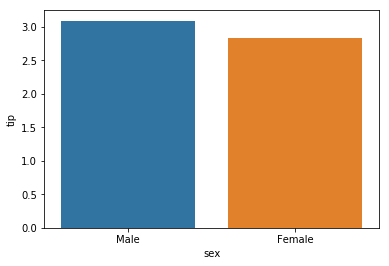

In [30]:
# 2. データを　加工せずに plot => sns.barplot
# estimator=<function mean>
sns.barplot(data=tips, x='sex', y='tip', ci=None)

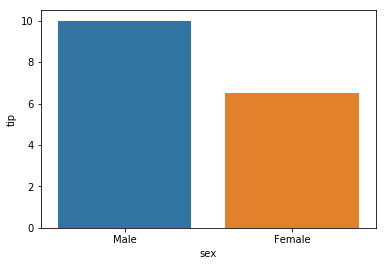

In [31]:
# 性別で　もっと チップを 渡した　金額
sns.barplot(data=tips, x='sex', y='tip', estimator=np.max, ci=None)

In [32]:
# 平均チップが　最も　多い　曜日は？
# pivot_table
# sns.barplot

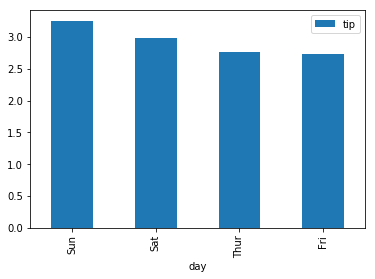

In [33]:
# 曜日別　平均チップを　棒の形で　見せます。
tips.pivot_table(index='day', values='tip', aggfunc='mean').plot(kind='bar')

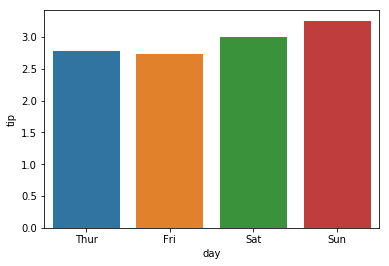

In [34]:
sns.barplot(data=tips, x='day', y='tip', ci=None)

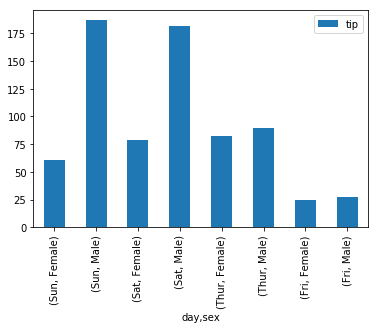

In [35]:
# 曜日別　性別　全体チップを比べる 
tips.pivot_table(index=['day','sex'], values='tip', aggfunc='sum').plot(kind='bar')

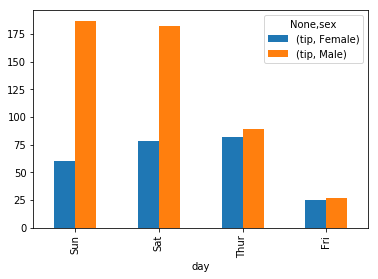

In [36]:
tips.pivot_table(index=['day','sex'], values='tip', aggfunc='sum').unstack().plot(kind='bar')

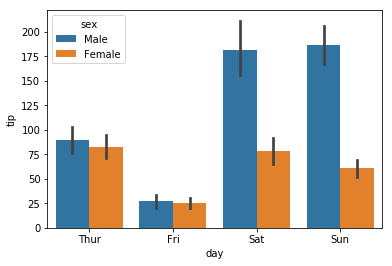

In [37]:
sns.barplot(data=tips,x='day', y='tip', estimator=sum, hue='sex')

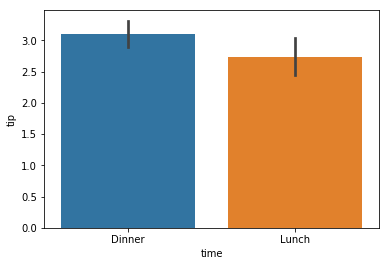

In [38]:
# 時間帯別　平均チップを比べる
sns.barplot(x='time', y='tip', data=tips, order=['Dinner', 'Lunch'])